# NEURON SIMULATOR STEP-BY-STEP GUIDE

This guide main aim is to show you how to use the NEURON Simulator on VSCode.

This file is called Jypyter notebook. It is a powerful tool for interactively developing and presenting data science projects. It combines code, visualizations, narrative text, and other rich media into a single document, creating a cohesive and expressive workflow.

## Set up

### NEURON Simulator set up
To download the app, look at this guide: https://nrn.readthedocs.io/en/8.2.6/install/install_instructions.html


### VSCode/Python set up
- VSCode download: https://code.visualstudio.com/Download
- Tutorial to download VScode: https://www.youtube.com/watch?time_continue=2&v=4iUJZEa2xP8&embeds_referring_euri=https%3A%2F%2Fduckduckgo.com%2F
- Python download: https://www.python.org/downloads/

## Run simulation

### Installments

In [ ]:
# Download matplotlib
!pip install matplotlib

In [4]:
# Import NEURON and optional GUI
from neuron import h, gui  

# Import matplotlib for visualization
import matplotlib.pyplot as plt

### Project 1

The code below main purpose is to create a function name SimpleNeuron with adjustible ion channel density. Using this function, we simulate a neuron with different ion channel density.

In [2]:
# Define a simple neuron model with adjustable ion channel density
class SimpleNeuron:
    def __init__(self, sodium_density=0.12, potassium_density=0.036):
        self.soma = h.Section(name='soma')
        self.soma.L = 20  # Length of soma (microns)
        self.soma.diam = 20  # Diameter of soma (microns)
        self.soma.insert('hh')  # Insert Hodgkin-Huxley channels
        
        # Set ion channel densities (in S/cm^2 for conductance)
        self.soma.gnabar_hh = sodium_density  # Sodium channel density (default: 0.12 S/cm^2)
        self.soma.gkbar_hh = potassium_density  # Potassium channel density (default: 0.036 S/cm^2)


The code below create 2 neurons, pre and postsynaptic neuron with different ion channel. There are 3 stimulation to the neuron. To change the variable like delay time and duration of a stimulation, you could click into the code and change the number. Running this code will show you the result of the simulation through a graph. There is also an explanation for each code like what is it using for in the #...

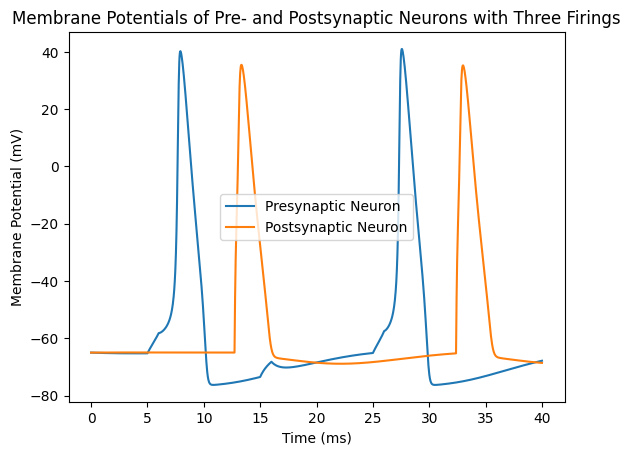

In [5]:

# Create pre- and postsynaptic neurons with different ion channel densities if desired
pre_neuron = SimpleNeuron(sodium_density=0.15, potassium_density=0.04)  # Adjust densities as needed
post_neuron = SimpleNeuron(sodium_density=0.12, potassium_density=0.036)

# Create a synapse on the postsynaptic neuron
syn = h.ExpSyn(post_neuron.soma(0.5))  # Exponential synapse at the midpoint of the postsynaptic soma
syn.tau = 2  # Synaptic time constant (ms)

# Connect the presynaptic neuron to the postsynaptic synapse
netcon = h.NetCon(pre_neuron.soma(0.5)._ref_v, syn, sec=pre_neuron.soma)  # Link voltage to synapse
netcon.weight[0] = 0.1  # Set initial synaptic weight
netcon.delay = 5  # Transmission delay (ms)

# Apply multiple current stimuli to the presynaptic neuron
stim1 = h.IClamp(pre_neuron.soma(0.5))  # First stimulus
stim1.delay = 5  # Start time of first stimulus (ms)
stim1.dur = 1  # Duration of first stimulus (ms)
stim1.amp = 0.1  # Amplitude of first stimulus (nA)

stim2 = h.IClamp(pre_neuron.soma(0.5))  # Second stimulus
stim2.delay = 15  # Start time for the second pulse (ms)
stim2.dur = 1  # Duration of the second pulse (ms)
stim2.amp = 0.1  # Amplitude of the second pulse (nA)

stim3 = h.IClamp(pre_neuron.soma(0.5))  # Third stimulus
stim3.delay = 25  # Start time for the third pulse (ms)
stim3.dur = 1  # Duration of the third pulse (ms)
stim3.amp = 0.1  # Amplitude of the third pulse (nA)

# Record time and membrane potentials for both neurons
t = h.Vector().record(h._ref_t)  # Record simulation time
v_pre = h.Vector().record(pre_neuron.soma(0.5)._ref_v)  # Record voltage from presynaptic neuron
v_post = h.Vector().record(post_neuron.soma(0.5)._ref_v)  # Record voltage from postsynaptic neuron

# Run the simulation
h.tstop = 40  # Simulation stop time (ms)
h.run()

# Plotting the results using matplotlib
plt.figure()
plt.plot(t, v_pre, label='Presynaptic Neuron')
plt.plot(t, v_post, label='Postsynaptic Neuron')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Membrane Potentials of Pre- and Postsynaptic Neurons with Three Firings')
plt.legend()
plt.show()